In [1]:
from ipynb.fs.full.config_helper import get_agg_config

import warnings
warnings.filterwarnings("ignore")

In [2]:
NUM_OF_PARTIES = 20
ROUNDS = 150
EPOCHS = 3

dataset='femnist'

In [3]:
from ibmfl.aggregator.aggregator import Aggregator

agg_config = get_agg_config(NUM_OF_PARTIES, ROUNDS, EPOCHS)
aggregator = Aggregator(config_dict=agg_config)

aggregator.start()

Yaml configuration file not found: log_config.yaml


2021-06-12T16:32:22.986Z | 1.0.5 | INFO | ibmfl.util.config                                  | Getting Aggregator details from arguments.
2021-06-12T16:32:22.987Z | 1.0.5 | INFO | ibmfl.util.config                                  | No data config provided for this setup.
2021-06-12T16:32:22.987Z | 1.0.5 | INFO | ibmfl.util.config                                  | No metrics recorder config provided for this setup.
2021-06-12T16:32:22.988Z | 1.0.5 | INFO | ibmfl.util.config                                  | No model config provided for this setup.
2021-06-12T16:32:23.345Z | 1.0.5 | INFO | ibmfl.util.config                                  | No data config provided for this setup.
2021-06-12T16:32:23.346Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | RestSender initialized
2021-06-12T16:32:23.346Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.START
2021-06-12T16:32:23.347Z | 1.0.5 | INFO | ibmfl.connection.flask_connection 

2021-06-12T16:33:24.037Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :6
2021-06-12T16:33:24.038Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Adding party with id party13
2021-06-12T16:33:24.039Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of registered parties:13
2021-06-12T16:33:24.040Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 16:33:24] "POST /6 HTTP/1.1" 200 -
2021-06-12T16:33:28.225Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :6
2021-06-12T16:33:28.232Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Adding party with id party14
2021-06-12T16:33:28.233Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of registered parties:14
2021-06-12T16:33:28.234Z | 1.0.5 | INFO | werkzeug                               

In [4]:
eval_party_acc = [[] for _ in range(NUM_OF_PARTIES)]
eval_party_loss = [[] for _ in range(NUM_OF_PARTIES)]
train_party_acc = [[] for _ in range(NUM_OF_PARTIES)]
train_party_loss = [[] for _ in range(NUM_OF_PARTIES)]
iterations = [[] for _ in range(NUM_OF_PARTIES)]

def get_metrics(metrics):
    keys = list(metrics['party'].keys())
    keys.sort()
    for i in range(len(keys)):
        eval_party_acc[i].append(metrics['party'][keys[i]]['test']['acc'])
        eval_party_loss[i].append(metrics['party'][keys[i]]['test']['loss'])
        train_party_acc[i].extend(metrics['party'][keys[i]]['train']['acc'])
        train_party_loss[i].extend(metrics['party'][keys[i]]['train']['loss'])
        iterations[i].append(metrics['fusion']['curr_round']*agg_config['hyperparams']['local']['training']['epochs'])

mh = aggregator.fusion.metrics_manager
mh.register(get_metrics)


aggregator.start_training()

2021-06-12T16:34:00.528Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Initiating Global Training.
2021-06-12T16:34:00.529Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_handler             | Warm start disabled.
2021-06-12T16:34:00.530Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model updateNone
2021-06-12T16:34:00.530Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-12T16:34:00.531Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-12T16:34:01.141Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-12T16:34:01.142Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-12T16:34:01.142Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-12T16:34:01.143

2021-06-12T16:35:25.930Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 16:35:25] "POST /7 HTTP/1.1" 200 -
2021-06-12T16:35:26.014Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 16:35:26] "POST /7 HTTP/1.1" 200 -
2021-06-12T16:35:26.015Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 16:35:26] "POST /7 HTTP/1.1" 200 -
2021-06-12T16:35:26.249Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:85
2021-06-12T16:35:26.250Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-12T16:35:26.250Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-12T16:35:26.251Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-12T16:35:26.321Z | 1.0.5 | IN

2021-06-12T16:36:07.738Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 16:36:07] "POST /7 HTTP/1.1" 200 -
2021-06-12T16:36:09.060Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-12T16:36:09.061Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-12T16:36:09.062Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-12T16:36:09.063Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-12T16:36:09.101Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f0555d68f98>
2021-06-12T16:36:09.102Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-12T16:36:09.103Z | 1.0.5 | INFO | ibmfl.aggrega

2021-06-12T16:36:51.165Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-12T16:36:51.165Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-12T16:36:51.204Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f056d689550>
2021-06-12T16:36:51.204Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-12T16:36:51.205Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-12T16:36:53.212Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-12T16:36:53.214Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-12T16:36:53.215Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_

2021-06-12T16:37:33.318Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-12T16:37:33.319Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-12T16:37:35.314Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-12T16:37:35.316Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-12T16:37:35.318Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-12T16:37:35.324Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-12T16:37:40.328Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-12T16:37:45.335Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-12

2021-06-12T16:38:18.037Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-12T16:38:18.037Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-12T16:38:18.038Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-12T16:38:23.043Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-12T16:38:28.047Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-12T16:38:33.051Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-12T16:38:38.055Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-12T16:38:43.063Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-12T16:38:48

2021-06-12T16:39:05.887Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-12T16:39:10.895Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-12T16:39:15.899Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-12T16:39:20.904Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-12T16:39:25.907Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-12T16:39:30.631Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T16:39:31.396Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:31
2021-06-12T16:39:31.665Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 16:39:31] "POST /7 HTTP

2021-06-12T16:40:03.540Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-12T16:40:08.543Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-12T16:40:12.319Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T16:40:12.859Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 16:40:12] "POST /7 HTTP/1.1" 200 -
2021-06-12T16:40:13.547Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-12T16:40:17.858Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T16:40:18.586Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-12T16:40:18.588Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - 

2021-06-12T16:40:58.052Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T16:40:58.440Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 16:40:58] "POST /7 HTTP/1.1" 200 -
2021-06-12T16:40:58.598Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T16:40:59.025Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 16:40:59] "POST /7 HTTP/1.1" 200 -
2021-06-12T16:41:00.957Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-12T16:41:02.867Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T16:41:02.959Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 16:41:02] "POST /7 HTTP/1.1" 200 -
2021-06-12T16:41:03.331Z | 1.0.5 | 

2021-06-12T16:41:43.702Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T16:41:44.149Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 16:41:44] "POST /7 HTTP/1.1" 200 -
2021-06-12T16:41:45.983Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T16:41:46.039Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T16:41:46.078Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 16:41:46] "POST /7 HTTP/1.1" 200 -
2021-06-12T16:41:46.128Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 16:41:46] "POST /7 HTTP/1.1" 200 -
2021-06-12T16:41:46.259Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T16:41:46.279Z | 1.0.5 

2021-06-12T16:42:24.214Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T16:42:24.875Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 16:42:24] "POST /7 HTTP/1.1" 200 -
2021-06-12T16:42:25.103Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-12T16:42:27.611Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T16:42:27.659Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T16:42:27.699Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 16:42:27] "POST /7 HTTP/1.1" 200 -
2021-06-12T16:42:27.699Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T16:42:27.734Z | 1.0.5 | INFO | werkzeug                  

2021-06-12T16:43:07.125Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T16:43:07.125Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 16:43:07] "POST /7 HTTP/1.1" 200 -
2021-06-12T16:43:07.496Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 16:43:07] "POST /7 HTTP/1.1" 200 -
2021-06-12T16:43:07.723Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T16:43:07.907Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 16:43:07] "POST /7 HTTP/1.1" 200 -
2021-06-12T16:43:08.371Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-12T16:43:08.967Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T16:43:09.042Z | 1.0.5 | 

2021-06-12T16:43:53.721Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T16:43:53.745Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T16:43:53.746Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 16:43:53] "POST /7 HTTP/1.1" 200 -
2021-06-12T16:43:53.786Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T16:43:53.787Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T16:43:53.789Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T16:43:53.790Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 16:43:53] "POST /7 HTTP/1.1" 200 -
2021-06-12T16:43:53.803Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-12T16:44:34.901Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T16:44:34.911Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T16:44:34.959Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T16:44:34.973Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 16:44:34] "POST /7 HTTP/1.1" 200 -
2021-06-12T16:44:34.974Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T16:44:34.974Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T16:44:34.995Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 16:44:34] "POST /7 HTTP/1.1" 200 -
2021-06-12T16:44:34.995Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-12T16:45:18.389Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T16:45:18.390Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T16:45:18.424Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T16:45:18.425Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 16:45:18] "POST /7 HTTP/1.1" 200 -
2021-06-12T16:45:18.427Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T16:45:18.428Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T16:45:18.428Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T16:45:18.442Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Requ

2021-06-12T16:46:00.107Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 16:46:00] "POST /7 HTTP/1.1" 200 -
2021-06-12T16:46:00.120Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T16:46:00.162Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 16:46:00] "POST /7 HTTP/1.1" 200 -
2021-06-12T16:46:00.163Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 16:46:00] "POST /7 HTTP/1.1" 200 -
2021-06-12T16:46:00.164Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T16:46:00.165Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T16:46:00.200Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T16:46:00.201Z | 1.0.5 

2021-06-12T16:46:42.094Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T16:46:42.094Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 16:46:42] "POST /7 HTTP/1.1" 200 -
2021-06-12T16:46:42.128Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 16:46:42] "POST /7 HTTP/1.1" 200 -
2021-06-12T16:46:42.129Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T16:46:42.131Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T16:46:42.132Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T16:46:42.134Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T16:46:42.137Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-12T16:47:23.791Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T16:47:23.792Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T16:47:23.794Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T16:47:23.828Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T16:47:23.829Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 16:47:23] "POST /7 HTTP/1.1" 200 -
2021-06-12T16:47:23.866Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 16:47:23] "POST /7 HTTP/1.1" 200 -
2021-06-12T16:47:23.900Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 16:47:23] "POST /7 HTTP/1.1" 200 -
2021-06-12T16:47:23.935Z | 1.0.5 

2021-06-12T16:48:07.154Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 16:48:07] "POST /7 HTTP/1.1" 200 -
2021-06-12T16:48:07.176Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 16:48:07] "POST /7 HTTP/1.1" 200 -
2021-06-12T16:48:07.212Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 16:48:07] "POST /7 HTTP/1.1" 200 -
2021-06-12T16:48:07.261Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 16:48:07] "POST /7 HTTP/1.1" 200 -
2021-06-12T16:48:07.282Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 16:48:07] "POST /7 HTTP/1.1" 200 -
2021-06-12T16:48:07.326Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 16:48:07] "POST /7 HTTP/1.1" 200 -
2021-06-12T16:48:07.387Z | 1.0.5 | INFO | werkzeug        

2021-06-12T16:48:50.097Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 16:48:50] "POST /7 HTTP/1.1" 200 -
2021-06-12T16:48:50.098Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 16:48:50] "POST /7 HTTP/1.1" 200 -
2021-06-12T16:48:50.132Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 16:48:50] "POST /7 HTTP/1.1" 200 -
2021-06-12T16:48:50.172Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 16:48:50] "POST /7 HTTP/1.1" 200 -
2021-06-12T16:48:50.219Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 16:48:50] "POST /7 HTTP/1.1" 200 -
2021-06-12T16:48:50.253Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 16:48:50] "POST /7 HTTP/1.1" 200 -
2021-06-12T16:48:50.276Z | 1.0.5 | INFO | werkzeug        

2021-06-12T16:49:31.217Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 16:49:31] "POST /7 HTTP/1.1" 200 -
2021-06-12T16:49:31.218Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 16:49:31] "POST /7 HTTP/1.1" 200 -
2021-06-12T16:49:31.286Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 16:49:31] "POST /7 HTTP/1.1" 200 -
2021-06-12T16:49:31.288Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 16:49:31] "POST /7 HTTP/1.1" 200 -
2021-06-12T16:49:31.338Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 16:49:31] "POST /7 HTTP/1.1" 200 -
2021-06-12T16:49:31.359Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 16:49:31] "POST /7 HTTP/1.1" 200 -
2021-06-12T16:49:31.394Z | 1.0.5 | INFO | werkzeug        

2021-06-12T16:50:14.767Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 16:50:14] "POST /7 HTTP/1.1" 200 -
2021-06-12T16:50:14.830Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 16:50:14] "POST /7 HTTP/1.1" 200 -
2021-06-12T16:50:14.863Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 16:50:14] "POST /7 HTTP/1.1" 200 -
2021-06-12T16:50:14.903Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 16:50:14] "POST /7 HTTP/1.1" 200 -
2021-06-12T16:50:14.904Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 16:50:14] "POST /7 HTTP/1.1" 200 -
2021-06-12T16:50:16.042Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-12T16:50:16.043Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        

2021-06-12T16:50:55.885Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 16:50:55] "POST /7 HTTP/1.1" 200 -
2021-06-12T16:50:55.941Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 16:50:55] "POST /7 HTTP/1.1" 200 -
2021-06-12T16:50:55.942Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 16:50:55] "POST /7 HTTP/1.1" 200 -
2021-06-12T16:50:59.135Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-12T16:50:59.136Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-12T16:50:59.137Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-12T16:50:59.137Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-12T16:50:59.172Z | 1.0.5 | IN

2021-06-12T16:51:39.675Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 16:51:39] "POST /7 HTTP/1.1" 200 -
2021-06-12T16:51:41.231Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-12T16:51:41.232Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-12T16:51:41.232Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-12T16:51:41.233Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-12T16:51:41.270Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f0555db6518>
2021-06-12T16:51:41.271Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-12T16:51:41.272Z | 1.0.5 | INFO | ibmfl.aggrega

2021-06-12T16:52:23.401Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-12T16:52:23.402Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-12T16:52:23.437Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f0554454470>
2021-06-12T16:52:23.438Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-12T16:52:23.438Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-12T16:52:24.930Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-12T16:52:24.931Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-12T16:52:24.931Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_

2021-06-12T16:53:05.033Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-12T16:53:05.034Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-12T16:53:07.075Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-12T16:53:07.076Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-12T16:53:07.077Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-12T16:53:07.079Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-12T16:53:12.083Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-12T16:53:17.091Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-12

2021-06-12T16:53:50.795Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-12T16:53:50.796Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-12T16:53:50.798Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-12T16:53:55.811Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-12T16:54:00.815Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-12T16:54:05.819Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-12T16:54:10.823Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-12T16:54:15.842Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-12T16:54:19

2021-06-12T16:54:38.567Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-12T16:54:43.576Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-12T16:54:48.583Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-12T16:54:53.587Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-12T16:54:58.602Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-12T16:55:03.607Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-12T16:55:06.173Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T16:55:06.888Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 16:55:06] "POST /7 HTTP

2021-06-12T16:55:35.655Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-12T16:55:40.659Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-12T16:55:45.663Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-12T16:55:48.786Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T16:55:49.510Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 16:55:49] "POST /7 HTTP/1.1" 200 -
2021-06-12T16:55:50.014Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T16:55:50.784Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-12T16:55:50.813Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - 

2021-06-12T16:56:29.237Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T16:56:29.791Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 16:56:29] "POST /7 HTTP/1.1" 200 -
2021-06-12T16:56:29.807Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T16:56:30.614Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 16:56:30] "POST /7 HTTP/1.1" 200 -
2021-06-12T16:56:31.480Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T16:56:31.483Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T16:56:32.064Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 16:56:32] "POST /7 HTTP/1.1" 200 -
2021-06-12T16:56:32.361Z | 1.0.5 

2021-06-12T16:57:15.944Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 16:57:15] "POST /7 HTTP/1.1" 200 -
2021-06-12T16:57:16.246Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T16:57:16.412Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-12T16:57:16.762Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 16:57:16] "POST /7 HTTP/1.1" 200 -
2021-06-12T16:57:18.351Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T16:57:18.434Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 16:57:18] "POST /7 HTTP/1.1" 200 -
2021-06-12T16:57:18.555Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T16:57:18.603Z | 1.0.5 | 

2021-06-12T16:58:00.744Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 16:58:00] "POST /7 HTTP/1.1" 200 -
2021-06-12T16:58:00.863Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T16:58:00.963Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 16:58:00] "POST /7 HTTP/1.1" 200 -
2021-06-12T16:58:01.055Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T16:58:01.117Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 16:58:01] "POST /7 HTTP/1.1" 200 -
2021-06-12T16:58:01.247Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T16:58:01.323Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T16:58:01.324Z | 1.0.5 

2021-06-12T16:58:43.358Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T16:58:43.483Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 16:58:43] "POST /7 HTTP/1.1" 200 -
2021-06-12T16:58:44.131Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T16:58:44.135Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T16:58:44.155Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T16:58:44.175Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T16:58:44.178Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T16:58:44.193Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Requ

2021-06-12T16:59:25.190Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 16:59:25] "POST /7 HTTP/1.1" 200 -
2021-06-12T16:59:26.067Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T16:59:26.079Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T16:59:26.090Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T16:59:26.107Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T16:59:26.110Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T16:59:26.165Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 16:59:26] "POST /7 HTTP/1.1" 200 -
2021-06-12T16:59:26.188Z | 1.0.5 | INFO | werkzeug                

2021-06-12T17:00:09.279Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:00:09.351Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:00:09] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:00:09.411Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:00:09.435Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:00:09.485Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:00:09] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:00:09.486Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:00:09.500Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:00:09.521Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-12T17:00:53.435Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:00:53] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:00:53.436Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:00:53.437Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:00:53.453Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:00:53.474Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:00:53] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:00:53.509Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:00:53.510Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:00:53] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:00:53.512Z | 1.0.5 

2021-06-12T17:01:34.267Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:01:34.267Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:01:34] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:01:34.268Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:01:34.270Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:01:34.312Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:01:34.312Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:01:34] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:01:34.327Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:01:34.360Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-12T17:02:16.889Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:02:16] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:02:16.890Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:02:16.891Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:02:16.906Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:02:16.959Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:02:16] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:02:16.960Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:02:16] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:02:16.961Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:02:16.962Z | 1.0.5 

2021-06-12T17:02:59.229Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:02:59.230Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:02:59.246Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:02:59.268Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:02:59] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:02:59.315Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:02:59] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:02:59.336Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:02:59] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:02:59.378Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:02:59] "POST /7 HTTP/1.1" 200 -


2021-06-12T17:03:42.115Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:03:42] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:03:42.116Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:03:42.117Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:03:42.119Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:03:42.155Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:03:42] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:03:42.225Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:03:42] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:03:42.238Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:03:42] "POST /7 HTTP/1.1" 200 -


2021-06-12T17:04:25.198Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:04:25.200Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:04:25.236Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:04:25] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:04:25.270Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:04:25] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:04:25.308Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:04:25] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:04:25.350Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:04:25] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:04:25.399Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17

2021-06-12T17:05:09.099Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:05:09] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:05:09.137Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:05:09] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:05:09.174Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:05:09] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:05:09.208Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:05:09] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:05:09.242Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:05:09] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:05:09.276Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:05:09] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:05:11.666Z | 1.0.5 | INFO | ibmfl.aggregator

2021-06-12T17:05:52.629Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:05:52] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:05:52.665Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:05:52] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:05:52.715Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:05:52] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:05:52.736Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:05:52] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:05:53.746Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-12T17:05:53.747Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-12T17:05:53.747Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06

2021-06-12T17:06:34.003Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:06:34] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:06:34.037Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:06:34] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:06:36.186Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-12T17:06:36.187Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-12T17:06:36.187Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-12T17:06:36.188Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-12T17:06:36.224Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f0554c94ef0>
2021-06-12T17:06:36.225

2021-06-12T17:07:18.086Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-12T17:07:18.087Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-12T17:07:18.088Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-12T17:07:18.088Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-12T17:07:18.125Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f0555d566a0>
2021-06-12T17:07:18.125Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-12T17:07:18.126Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-12T17:07:19.930Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | 

2021-06-12T17:07:59.994Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-12T17:08:00.030Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f0554c8d908>
2021-06-12T17:08:00.031Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-12T17:08:00.032Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-12T17:08:01.665Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-12T17:08:01.666Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-12T17:08:01.667Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-12T17:08:01.667Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.prot

2021-06-12T17:08:41.878Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-12T17:08:44.803Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-12T17:08:44.804Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-12T17:08:44.809Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-12T17:08:44.821Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-12T17:08:49.823Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-12T17:08:54.831Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-12T17:08:59.835Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-12T17

2021-06-12T17:09:27.394Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-12T17:09:27.395Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-12T17:09:32.399Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-12T17:09:37.403Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-12T17:09:42.408Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-12T17:09:47.439Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-12T17:09:52.452Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-12T17:09:57.459Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-12T17:09:58.8

2021-06-12T17:10:19.431Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-12T17:10:24.435Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-12T17:10:29.443Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-12T17:10:34.451Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-12T17:10:39.455Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-12T17:10:44.463Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-12T17:10:44.849Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:10:45.369Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:10:45] "POST /7 HTT

2021-06-12T17:11:16.939Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-12T17:11:21.488Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:11:21.999Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-12T17:11:22.638Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:11:22] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:11:22.664Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:11:23.091Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:11:23] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:11:25.281Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:11:25.650Z | 1.0.5 | INFO | werkzeug                    

2021-06-12T17:12:09.438Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:12:09] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:12:09.575Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-12T17:12:10.001Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:12:10.467Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:12:10] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:12:10.491Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:12:10.797Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:12:10] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:12:11.875Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:12:12.027Z | 1.0.5 | 

2021-06-12T17:12:50.776Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:12:51.266Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:12:51] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:12:51.350Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:12:51.770Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-12T17:12:51.771Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:12:51] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:12:54.211Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:12:54.239Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:12:54.298Z | 1.0.5 | INFO | werkzeug                  

2021-06-12T17:13:36.871Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:13:36.883Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:13:36.893Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:13:36.935Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:13:37.003Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:13:37] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:13:37.004Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:13:37] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:13:37.040Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:13:37] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:13:37.041Z | 1.0.5 

2021-06-12T17:14:19.324Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:14:19] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:14:19.345Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:14:19] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:14:19.347Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:14:19.426Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:14:19] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:14:19.427Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:14:19] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:14:19.428Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:14:19.429Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7


2021-06-12T17:15:00.259Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:15:00.262Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:15:00.277Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:15:00.316Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:15:00] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:15:00.317Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:15:00.404Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:15:00] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:15:00.418Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:15:00] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:15:00.438Z | 1.0.5 

2021-06-12T17:15:42.482Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:15:42.608Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:15:42] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:15:42.609Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:15:42.663Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:15:42] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:15:42.664Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:15:42] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:15:42.665Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:15:42] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:15:42.665Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17

2021-06-12T17:16:25.495Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:16:25] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:16:25.495Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:16:25] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:16:25.497Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:16:25.498Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:16:25.500Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:16:25.536Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:16:25.537Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:16:25.538Z | 1.0.5 | INFO | werkzeug                

2021-06-12T17:17:06.286Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:17:06.287Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:17:06.322Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:17:06.323Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:17:06] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:17:06.324Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:17:06.338Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:17:06.359Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:17:06] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:17:06.360Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-12T17:17:48.693Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:17:48] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:17:48.694Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:17:48.695Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:17:48] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:17:48.696Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:17:48.733Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:17:48.734Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:17:48.735Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:17:48] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:17:48.736Z | 1.0.5 

2021-06-12T17:18:31.516Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:18:31.537Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:18:31.538Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:18:31] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:18:31.551Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:18:31.573Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:18:31] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:18:31.610Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:18:31] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:18:31.661Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:18:31] "POST /7 HTTP/1.1" 200 -


2021-06-12T17:19:14.603Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:19:14] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:19:14.657Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:19:14] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:19:14.679Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:19:14] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:19:14.720Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:19:14] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:19:14.755Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:19:14] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:19:14.802Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:19:14] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:19:14.823Z | 1.0.5 | INFO | werkzeug        

2021-06-12T17:19:56.322Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:19:56] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:19:56.359Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:19:56] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:19:56.393Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:19:56] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:19:56.428Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:19:56] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:19:56.489Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:19:56] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:19:56.530Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:19:56] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:19:56.531Z | 1.0.5 | INFO | werkzeug        

2021-06-12T17:20:38.924Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:20:38] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:20:38.962Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:20:38] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:20:39.031Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:20:39] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:20:39.033Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:20:39] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:20:39.100Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:20:39] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:20:39.101Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:20:39] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:20:39.137Z | 1.0.5 | INFO | werkzeug        

2021-06-12T17:21:21.562Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:21:21] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:21:21.600Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:21:21] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:21:21.635Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:21:21] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:21:21.706Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:21:21] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:21:21.706Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:21:21] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:21:21.739Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:21:21] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:21:24.464Z | 1.0.5 | INFO | ibmfl.aggregator

2021-06-12T17:22:05.310Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:22:05] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:22:05.345Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:22:05] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:22:05.380Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:22:05] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:22:05.416Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:22:05] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:22:06.729Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-12T17:22:06.730Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-12T17:22:06.731Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06

2021-06-12T17:22:47.548Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:22:47] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:22:47.586Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:22:47] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:22:48.553Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-12T17:22:48.554Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-12T17:22:48.554Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-12T17:22:48.555Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-12T17:22:48.596Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f055443d6d8>
2021-06-12T17:22:48.597

2021-06-12T17:23:30.442Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-12T17:23:30.443Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-12T17:23:30.443Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-12T17:23:30.444Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-12T17:23:30.479Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f05711454e0>
2021-06-12T17:23:30.479Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-12T17:23:30.480Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-12T17:23:33.311Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | 

2021-06-12T17:24:13.807Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-12T17:24:13.845Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f055440ddd8>
2021-06-12T17:24:13.845Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-12T17:24:13.846Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-12T17:24:16.516Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-12T17:24:16.518Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-12T17:24:16.519Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-12T17:24:16.520Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.prot

2021-06-12T17:24:56.633Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-12T17:24:58.157Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-12T17:24:58.158Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-12T17:24:58.159Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-12T17:24:58.160Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-12T17:25:03.167Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-12T17:25:08.172Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-12T17:25:13.183Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-12T17

2021-06-12T17:25:40.295Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-12T17:25:40.296Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-12T17:25:45.300Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-12T17:25:50.303Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-12T17:25:55.307Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-12T17:26:00.311Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-12T17:26:05.315Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-12T17:26:10.319Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-12T17:26:14.6

2021-06-12T17:26:32.315Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-12T17:26:37.331Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-12T17:26:42.335Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-12T17:26:47.343Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-12T17:26:52.351Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-12T17:26:55.645Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:26:56.057Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:26:56] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:26:56.633Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request receiv

2021-06-12T17:27:29.687Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-12T17:27:34.691Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-12T17:27:37.113Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:27:37.750Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:27:37] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:27:37.890Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:27:38.271Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:27:38] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:27:39.695Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-12T17:27:41.387Z | 1.0.5 | INFO | ibmfl.connection.flask_connect

2021-06-12T17:28:19.211Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:28:19] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:28:19.212Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:28:19.837Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:28:19] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:28:21.136Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:28:21.407Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:28:21] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:28:21.900Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-12T17:28:24.527Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:28:24.587Z | 1.0.5 | 

2021-06-12T17:29:05.609Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:29:05] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:29:06.295Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:29:06.390Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:29:06] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:29:06.767Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:29:06.770Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:29:06.869Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:29:06] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:29:06.889Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:29:06] "POST /7 HTTP/1.1" 200 -


2021-06-12T17:29:48.393Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:29:48] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:29:48.394Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:29:48.478Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:29:48] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:29:48.532Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:29:48] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:29:48.900Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:29:48.931Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:29:48.951Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:29:48.988Z | 1.0.5 

2021-06-12T17:30:31.439Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:30:31.533Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:30:31] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:30:31.534Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:30:31.535Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:30:31.539Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:30:31.545Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:30:31.569Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:30:31.573Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Requ

2021-06-12T17:31:14.231Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:31:14.251Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:31:14.291Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:31:14] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:31:14.292Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:31:14.294Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:31:14.341Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:31:14] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:31:14.367Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:31:14.368Z | 1.0.5 | INFO | werkzeug                

2021-06-12T17:31:56.317Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:31:56.319Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:31:56.353Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:31:56.353Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:31:56] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:31:56.354Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:31:56.390Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:31:56.391Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:31:56] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:31:56.393Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-12T17:32:38.465Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:32:38] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:32:38.486Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:32:38.486Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:32:38] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:32:38.535Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:32:38.536Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:32:38] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:32:38.558Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:32:38] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:32:38.559Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7


2021-06-12T17:33:21.171Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:33:21.172Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:33:21.173Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:33:21.174Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:33:21.187Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:33:21.211Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:33:21] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:33:21.212Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:33:21.214Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Requ

2021-06-12T17:34:03.436Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:34:03.460Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:34:03] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:34:03.460Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:34:03.462Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:34:03.464Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:34:03.465Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:34:03.501Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:34:03] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:34:03.504Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-12T17:34:46.364Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:34:46.404Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:34:46] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:34:46.405Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:34:46] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:34:46.407Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:34:46.429Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:34:46.431Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:34:46] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:34:46.457Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:34:46.498Z | 1.0.5 

2021-06-12T17:35:28.593Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:35:28.616Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:35:28] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:35:28.662Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:35:28] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:35:28.696Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:35:28] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:35:28.777Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:35:28] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:35:28.811Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:35:28] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:35:28.812Z | 1.0.5 | INFO | werkzeug                                         

2021-06-12T17:36:11.409Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:36:11] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:36:11.430Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:36:11] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:36:11.469Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:36:11] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:36:11.506Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:36:11] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:36:11.540Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:36:11] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:36:11.587Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:36:11] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:36:11.610Z | 1.0.5 | INFO | werkzeug        

2021-06-12T17:36:52.447Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:36:52] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:36:52.486Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:36:52] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:36:52.520Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:36:52] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:36:52.586Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:36:52] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:36:52.587Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:36:52] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:36:52.626Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:36:52] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:36:53.813Z | 1.0.5 | INFO | ibmfl.aggregator

2021-06-12T17:37:34.134Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:37:34] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:37:34.187Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:37:34] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:37:34.188Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:37:34] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:37:34.227Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:37:34] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:37:36.474Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-12T17:37:36.474Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-12T17:37:36.475Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06

2021-06-12T17:38:16.947Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:38:16] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:38:16.968Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:38:16] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:38:19.298Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-12T17:38:19.299Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-12T17:38:19.299Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-12T17:38:19.300Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-12T17:38:19.347Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f0555d68f60>
2021-06-12T17:38:19.348

2021-06-12T17:39:02.395Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-12T17:39:02.396Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-12T17:39:02.397Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-12T17:39:02.397Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-12T17:39:02.435Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f0555db6fd0>
2021-06-12T17:39:02.435Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-12T17:39:02.436Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-12T17:39:05.244Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | 

2021-06-12T17:39:45.399Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-12T17:39:45.441Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f05543cecc0>
2021-06-12T17:39:45.442Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-12T17:39:45.443Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-12T17:39:47.852Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-12T17:39:47.854Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-12T17:39:47.855Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-12T17:39:47.857Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.prot

2021-06-12T17:40:28.002Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-12T17:40:30.474Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-12T17:40:30.475Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-12T17:40:30.477Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-12T17:40:30.478Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-12T17:40:35.483Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-12T17:40:40.487Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-12T17:40:45.495Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-12T17

2021-06-12T17:41:12.753Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-12T17:41:12.754Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-12T17:41:17.759Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-12T17:41:22.763Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-12T17:41:27.768Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-12T17:41:32.771Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-12T17:41:37.779Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-12T17:41:42.788Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-12T17:41:44.3

2021-06-12T17:42:05.411Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-12T17:42:10.423Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-12T17:42:15.428Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-12T17:42:20.439Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-12T17:42:25.448Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-12T17:42:25.974Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:42:26.636Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:42:26] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:42:27.725Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request receiv

2021-06-12T17:43:02.391Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-12T17:43:07.400Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-12T17:43:07.725Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:43:08.049Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:43:08] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:43:12.378Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:43:12.405Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-12T17:43:12.875Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:43:12] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:43:15.527Z | 1.0.5 | INFO | ibmfl.connection.flask_connect

2021-06-12T17:43:52.228Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:43:52.498Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:43:52] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:43:52.890Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:43:52] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:43:53.361Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:43:53.742Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:43:53] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:43:54.792Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-12T17:43:56.697Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:43:56.844Z | 1.0.5 | 

2021-06-12T17:44:36.995Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:44:36] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:44:38.115Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:44:38.524Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:44:38] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:44:39.823Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:44:39.905Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:44:39] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:44:39.959Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:44:40.041Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:44:40.043Z | 1.0.5 

2021-06-12T17:45:20.022Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:45:20.041Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:45:20.359Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-12T17:45:20.398Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:45:20] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:45:20.499Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:45:20] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:45:20.895Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:45:20.935Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:45:20.995Z | 1.0.5 | INFO | werkzeug                  

2021-06-12T17:46:03.709Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:46:04.151Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:46:04] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:46:05.446Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:46:05.505Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:46:05] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:46:05.771Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:46:05.871Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:46:05] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:46:06.091Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:46:06.095Z | 1.0.5 

2021-06-12T17:46:49.300Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:46:49] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:46:49.301Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:46:49.366Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:46:49] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:46:49.367Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:46:49.418Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:46:49] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:46:49.439Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:46:49] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:46:49.441Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7


2021-06-12T17:47:31.586Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:47:31] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:47:31.620Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:47:31] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:47:31.643Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:47:31] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:47:31.645Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:47:31.697Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:47:31] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:47:31.719Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:47:31.720Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17

2021-06-12T17:48:12.859Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:48:12.934Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:48:12] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:48:13.155Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:48:13.203Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:48:13.225Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:48:13.226Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:48:13] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:48:13.227Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:48:13.229Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-12T17:48:57.226Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:48:57] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:48:57.228Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:48:57.266Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:48:57] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:48:57.268Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:48:57.270Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:48:57.298Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:48:57.319Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:48:57] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:48:57.321Z | 1.0.5 

2021-06-12T17:49:39.471Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:49:39.522Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:49:39.543Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:49:39] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:49:39.544Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:49:39] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:49:39.547Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:49:39.580Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:49:39.581Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:49:39] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:49:39.595Z | 1.0.5 

2021-06-12T17:50:22.202Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:50:22] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:50:22.204Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:50:22.241Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:50:22.241Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:50:22] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:50:22.242Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:50:22.258Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:50:22.293Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:50:22] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:50:22.327Z | 1.0.5 

2021-06-12T17:51:04.610Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:51:04.631Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:51:04.633Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:51:04] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:51:04.676Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:51:04] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:51:04.711Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:51:04] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:51:04.778Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:51:04] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:51:04.779Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17

2021-06-12T17:51:47.266Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:51:47.300Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:51:47.301Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:51:47] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:51:47.344Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:51:47] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:51:47.397Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:51:47] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:51:47.418Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:51:47] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:51:47.459Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17

2021-06-12T17:52:28.800Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:52:28] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:52:28.836Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:52:28] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:52:28.870Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:52:28] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:52:28.922Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:52:28] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:52:28.943Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:52:28] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:52:28.994Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:52:28] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:52:29.021Z | 1.0.5 | INFO | werkzeug        

2021-06-12T17:53:11.042Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:53:11] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:53:11.076Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:53:11] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:53:11.100Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:53:11] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:53:11.168Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:53:11] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:53:11.169Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:53:11] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:53:12.687Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-12T17:53:12.688Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        

2021-06-12T17:53:54.455Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:53:54] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:53:54.456Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:53:54] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:53:54.457Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:53:54] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:53:55.066Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-12T17:53:55.066Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-12T17:53:55.067Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-12T17:53:55.067Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-12T17:53:55.111Z | 1.0.5 | IN

2021-06-12T17:54:36.187Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:54:36] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:54:37.255Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-12T17:54:37.256Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-12T17:54:37.256Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-12T17:54:37.257Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-12T17:54:37.294Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f0571168550>
2021-06-12T17:54:37.294Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-12T17:54:37.295Z | 1.0.5 | INFO | ibmfl.aggrega

2021-06-12T17:55:20.073Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-12T17:55:20.073Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-12T17:55:20.114Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f057235b3c8>
2021-06-12T17:55:20.115Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-12T17:55:20.115Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-12T17:55:21.709Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-12T17:55:21.709Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-12T17:55:21.710Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_

2021-06-12T17:56:06.837Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f0556100710>
2021-06-12T17:56:06.838Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-12T17:56:06.839Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-12T17:56:09.539Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-12T17:56:09.539Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-12T17:56:09.540Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-12T17:56:09.541Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-12T17:56:14.543Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_hand

2021-06-12T17:56:52.102Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-12T17:56:52.103Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-12T17:56:52.104Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-12T17:56:52.106Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-12T17:56:57.111Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-12T17:57:02.128Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-12T17:57:07.135Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-12T17:57:12.143Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-

2021-06-12T17:57:34.770Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-12T17:57:39.779Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-12T17:57:44.783Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-12T17:57:49.787Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-12T17:57:54.792Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-12T17:57:59.795Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-12T17:58:04.799Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-12T17:58:05.532Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:58:06.195Z

2021-06-12T17:58:31.907Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-12T17:58:36.911Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-12T17:58:41.915Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-12T17:58:46.919Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-12T17:58:51.923Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-12T17:58:51.955Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:58:52.463Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:58:52] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:58:54.513Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request receiv

2021-06-12T17:59:29.092Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-12T17:59:34.098Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-12T17:59:34.342Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:59:35.130Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:59:35] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:59:36.044Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:59:36.244Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 17:59:36] "POST /7 HTTP/1.1" 200 -
2021-06-12T17:59:36.432Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T17:59:36.574Z | 1.0.5 | INFO | werkzeug                    

2021-06-12T18:00:14.680Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:00:15.127Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 18:00:15] "POST /7 HTTP/1.1" 200 -
2021-06-12T18:00:16.478Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-12T18:00:17.231Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:00:17.893Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 18:00:17] "POST /7 HTTP/1.1" 200 -
2021-06-12T18:00:18.053Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:00:18.293Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 18:00:18] "POST /7 HTTP/1.1" 200 -
2021-06-12T18:00:19.087Z | 1.0.5 | 

2021-06-12T18:00:58.766Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:00:58.856Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 18:00:58] "POST /7 HTTP/1.1" 200 -
2021-06-12T18:00:59.201Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 18:00:59] "POST /7 HTTP/1.1" 200 -
2021-06-12T18:00:59.201Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-12T18:00:59.636Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:01:00.178Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 18:01:00] "POST /7 HTTP/1.1" 200 -
2021-06-12T18:01:01.579Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:01:01.623Z | 1.0.5 | 

2021-06-12T18:01:42.181Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 18:01:42] "POST /7 HTTP/1.1" 200 -
2021-06-12T18:01:43.207Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:01:43.545Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 18:01:43] "POST /7 HTTP/1.1" 200 -
2021-06-12T18:01:44.392Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:01:44.486Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 18:01:44] "POST /7 HTTP/1.1" 200 -
2021-06-12T18:01:44.487Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:01:44.563Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 18:01:44] "POST /7 HTTP/1.1" 200 -


2021-06-12T18:02:28.369Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 18:02:28] "POST /7 HTTP/1.1" 200 -
2021-06-12T18:02:28.405Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 18:02:28] "POST /7 HTTP/1.1" 200 -
2021-06-12T18:02:28.421Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:02:28.443Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 18:02:28] "POST /7 HTTP/1.1" 200 -
2021-06-12T18:02:28.460Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:02:28.484Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 18:02:28] "POST /7 HTTP/1.1" 200 -
2021-06-12T18:02:28.485Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7


2021-06-12T18:03:10.430Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:03:10.472Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:03:10.474Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 18:03:10] "POST /7 HTTP/1.1" 200 -
2021-06-12T18:03:10.509Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 18:03:10] "POST /7 HTTP/1.1" 200 -
2021-06-12T18:03:10.524Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:03:10.539Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:03:10.582Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:03:10.583Z | 1.0.5 | INFO | werkzeug                

2021-06-12T18:03:52.466Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:03:52.467Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:03:52.469Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 18:03:52] "POST /7 HTTP/1.1" 200 -
2021-06-12T18:03:52.471Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:03:52.485Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:03:52.509Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 18:03:52] "POST /7 HTTP/1.1" 200 -
2021-06-12T18:03:52.511Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:03:52.512Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-12T18:04:33.559Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:04:33.594Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:04:33.595Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 18:04:33] "POST /7 HTTP/1.1" 200 -
2021-06-12T18:04:33.596Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 18:04:33] "POST /7 HTTP/1.1" 200 -
2021-06-12T18:04:33.598Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:04:33.599Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:04:33.601Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:04:33.602Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-12T18:05:15.919Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 18:05:15] "POST /7 HTTP/1.1" 200 -
2021-06-12T18:05:15.955Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:05:15.956Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 18:05:15] "POST /7 HTTP/1.1" 200 -
2021-06-12T18:05:16.011Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 18:05:16] "POST /7 HTTP/1.1" 200 -
2021-06-12T18:05:16.011Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:05:16.012Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:05:16.026Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 18:05:16] "POST /7 HTTP/1.1" 200 -


2021-06-12T18:05:58.825Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 18:05:58] "POST /7 HTTP/1.1" 200 -
2021-06-12T18:05:58.849Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:05:58.849Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 18:05:58] "POST /7 HTTP/1.1" 200 -
2021-06-12T18:05:58.850Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:05:58.851Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:05:58.852Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:05:58.853Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:05:58.894Z | 1.0.5 | INFO | werkzeug                

2021-06-12T18:06:41.311Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:06:41.346Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 18:06:41] "POST /7 HTTP/1.1" 200 -
2021-06-12T18:06:41.349Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:06:41.350Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:06:41.354Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:06:41.355Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:06:41.393Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 18:06:41] "POST /7 HTTP/1.1" 200 -
2021-06-12T18:06:41.430Z | 1.0.5 | INFO | werkzeug                

2021-06-12T18:07:24.181Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 18:07:24] "POST /7 HTTP/1.1" 200 -
2021-06-12T18:07:24.183Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:07:24.220Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 18:07:24] "POST /7 HTTP/1.1" 200 -
2021-06-12T18:07:24.306Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 18:07:24] "POST /7 HTTP/1.1" 200 -
2021-06-12T18:07:24.307Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 18:07:24] "POST /7 HTTP/1.1" 200 -
2021-06-12T18:07:24.340Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 18:07:24] "POST /7 HTTP/1.1" 200 -
2021-06-12T18:07:24.362Z | 1.0.5 | INFO | werkzeug                                         

2021-06-12T18:08:06.679Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 18:08:06] "POST /7 HTTP/1.1" 200 -
2021-06-12T18:08:06.720Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 18:08:06] "POST /7 HTTP/1.1" 200 -
2021-06-12T18:08:06.762Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 18:08:06] "POST /7 HTTP/1.1" 200 -
2021-06-12T18:08:06.812Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 18:08:06] "POST /7 HTTP/1.1" 200 -
2021-06-12T18:08:06.834Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 18:08:06] "POST /7 HTTP/1.1" 200 -
2021-06-12T18:08:06.868Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 18:08:06] "POST /7 HTTP/1.1" 200 -
2021-06-12T18:08:06.902Z | 1.0.5 | INFO | werkzeug        

2021-06-12T18:08:49.455Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 18:08:49] "POST /7 HTTP/1.1" 200 -
2021-06-12T18:08:49.529Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 18:08:49] "POST /7 HTTP/1.1" 200 -
2021-06-12T18:08:49.531Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 18:08:49] "POST /7 HTTP/1.1" 200 -
2021-06-12T18:08:49.568Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 18:08:49] "POST /7 HTTP/1.1" 200 -
2021-06-12T18:08:49.607Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 18:08:49] "POST /7 HTTP/1.1" 200 -
2021-06-12T18:08:49.641Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 18:08:49] "POST /7 HTTP/1.1" 200 -
2021-06-12T18:08:50.854Z | 1.0.5 | INFO | ibmfl.aggregator

2021-06-12T18:09:32.133Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 18:09:32] "POST /7 HTTP/1.1" 200 -
2021-06-12T18:09:32.169Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 18:09:32] "POST /7 HTTP/1.1" 200 -
2021-06-12T18:09:32.205Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 18:09:32] "POST /7 HTTP/1.1" 200 -
2021-06-12T18:09:32.240Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 18:09:32] "POST /7 HTTP/1.1" 200 -
2021-06-12T18:09:32.821Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-12T18:09:32.821Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-12T18:09:32.822Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06

2021-06-12T18:10:13.641Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 18:10:13] "POST /7 HTTP/1.1" 200 -
2021-06-12T18:10:13.642Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 18:10:13] "POST /7 HTTP/1.1" 200 -
2021-06-12T18:10:16.258Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-12T18:10:16.258Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-12T18:10:16.259Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-12T18:10:16.259Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-12T18:10:16.299Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f056d696080>
2021-06-12T18:10:16.300

2021-06-12T18:10:58.503Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:40
2021-06-12T18:10:58.504Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.PROC_RSP
2021-06-12T18:10:58.504Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.RCV_MODEL
2021-06-12T18:10:58.505Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-12T18:10:58.546Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f0571168550>
2021-06-12T18:10:58.547Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-12T18:10:58.548Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-12T18:11:01.577Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | 

2021-06-12T18:11:41.624Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.AGGREGATING
2021-06-12T18:11:41.676Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.iter_avg_fusion_handler    | Model update<ibmfl.model.model_update.ModelUpdate object at 0x7f0555d5b7f0>
2021-06-12T18:11:41.677Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_state_service       | Fusion state States.SND_MODEL
2021-06-12T18:11:41.678Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-12T18:11:43.546Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-12T18:11:43.547Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-12T18:11:43.547Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-12T18:11:43.548Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.prot

2021-06-12T18:12:23.660Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-12T18:12:25.526Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-12T18:12:25.527Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-12T18:12:25.528Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-12T18:12:25.529Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-12T18:12:30.531Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-12T18:12:35.535Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-12T18:12:40.555Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-12T18

2021-06-12T18:13:07.925Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-12T18:13:07.927Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.QUORUM_WAIT
2021-06-12T18:13:12.931Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:5
2021-06-12T18:13:17.935Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-12T18:13:22.939Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-12T18:13:27.944Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-12T18:13:32.951Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-12T18:13:37.955Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-12T18:13:40.8

2021-06-12T18:13:59.759Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:10
2021-06-12T18:14:04.776Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:15
2021-06-12T18:14:09.791Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:20
2021-06-12T18:14:14.795Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-12T18:14:19.799Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-12T18:14:23.623Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:14:24.245Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 18:14:24] "POST /7 HTTP/1.1" 200 -
2021-06-12T18:14:24.811Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 T

2021-06-12T18:14:57.319Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:25
2021-06-12T18:15:02.331Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:30
2021-06-12T18:15:03.206Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:15:04.095Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 18:15:04] "POST /7 HTTP/1.1" 200 -
2021-06-12T18:15:06.031Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:15:06.367Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:15:06.419Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 18:15:06] "POST /7 HTTP/1.1" 200 -
2021-06-12T18:15:06.770Z | 1.0.5 | INFO | werkzeug                    

2021-06-12T18:15:47.103Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 18:15:47] "POST /7 HTTP/1.1" 200 -
2021-06-12T18:15:49.139Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:15:49.665Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 18:15:49] "POST /7 HTTP/1.1" 200 -
2021-06-12T18:15:49.899Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Timeout:2000 Time spent:35
2021-06-12T18:15:52.304Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:15:52.489Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 18:15:52] "POST /7 HTTP/1.1" 200 -
2021-06-12T18:15:52.576Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:15:52.741Z | 1.0.5 | 

2021-06-12T18:16:34.900Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 18:16:34] "POST /7 HTTP/1.1" 200 -
2021-06-12T18:16:35.287Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:16:35.376Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 18:16:35] "POST /7 HTTP/1.1" 200 -
2021-06-12T18:16:35.519Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:16:35.523Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:16:35.622Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 18:16:35] "POST /7 HTTP/1.1" 200 -
2021-06-12T18:16:35.644Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 18:16:35] "POST /7 HTTP/1.1" 200 -


2021-06-12T18:17:15.827Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:17:15.831Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:17:16.007Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 18:17:16] "POST /7 HTTP/1.1" 200 -
2021-06-12T18:17:16.149Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 18:17:16] "POST /7 HTTP/1.1" 200 -
2021-06-12T18:17:16.827Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:17:16.919Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:17:16.920Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 18:17:16] "POST /7 HTTP/1.1" 200 -
2021-06-12T18:17:16.975Z | 1.0.5 

2021-06-12T18:18:00.017Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 18:18:00] "POST /7 HTTP/1.1" 200 -
2021-06-12T18:18:00.835Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:18:00.849Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:18:00.874Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:18:00.878Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:18:00.883Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:18:00.886Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:18:00.889Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Requ

2021-06-12T18:18:42.955Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:18:43.031Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 18:18:43] "POST /7 HTTP/1.1" 200 -
2021-06-12T18:18:43.063Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:18:43.140Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 18:18:43] "POST /7 HTTP/1.1" 200 -
2021-06-12T18:18:43.141Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:18:43.141Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:18:43.143Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:18:43.146Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-12T18:19:25.361Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 18:19:25] "POST /7 HTTP/1.1" 200 -
2021-06-12T18:19:25.417Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 18:19:25] "POST /7 HTTP/1.1" 200 -
2021-06-12T18:19:25.418Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:19:25.419Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:19:25.420Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 18:19:25] "POST /7 HTTP/1.1" 200 -
2021-06-12T18:19:25.422Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:19:25.424Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:19:25.425Z | 1.0.5 

2021-06-12T18:20:09.828Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 18:20:09] "POST /7 HTTP/1.1" 200 -
2021-06-12T18:20:09.829Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:20:09.830Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:20:09.832Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:20:09.833Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:20:09.835Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:20:09.870Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 18:20:09] "POST /7 HTTP/1.1" 200 -
2021-06-12T18:20:09.870Z | 1.0.5 | INFO | ibmfl.connection.flask_c

2021-06-12T18:20:55.651Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:20:55.653Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 18:20:55] "POST /7 HTTP/1.1" 200 -
2021-06-12T18:20:55.688Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:20:55.689Z | 1.0.5 | INFO | werkzeug                                           | 127.0.0.1 - - [12/Jun/2021 18:20:55] "POST /7 HTTP/1.1" 200 -
2021-06-12T18:20:55.689Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:20:55.692Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:20:55.694Z | 1.0.5 | INFO | ibmfl.connection.flask_connection                  | Request received for path :7
2021-06-12T18:20:55.696Z | 1.0.5 | INFO | ibmfl.connection.flask_c

True

In [5]:
from matplotlib import pyplot as plt
from scipy.interpolate import make_interp_spline
import numpy as np
import seaborn as sns

sns.set_theme(style="darkgrid")

def smooth_curve(xaxis, yaxis):
    xnew = np.linspace(min(xaxis), max(xaxis), 300) 

    spl = make_interp_spline(xaxis, yaxis, k=2)  # type: BSpline
    power_smooth = spl(xnew)
    return xnew, power_smooth 

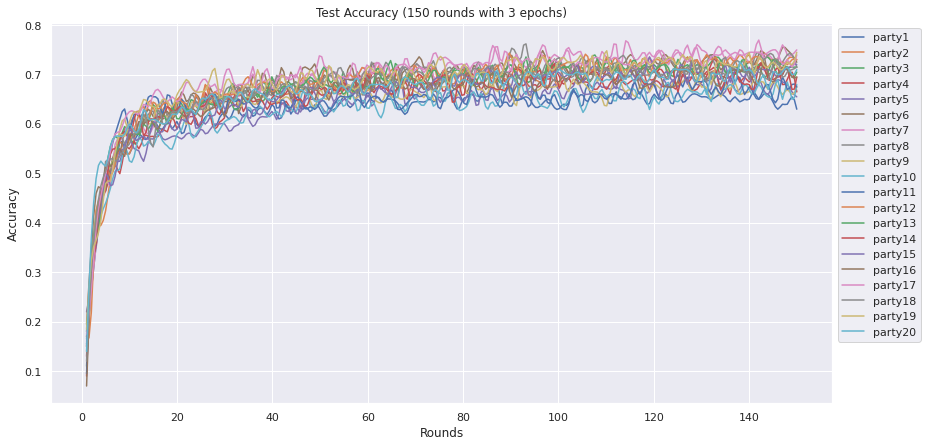

In [6]:
LIST_OF_ROUNDS = range(1, ROUNDS + 1)
f = plt.figure(figsize=(14, 7))

for i in range(NUM_OF_PARTIES):
    party_label = f"party{i+1}"
    eval_party_xaxis, eval_party_yaxis = smooth_curve(LIST_OF_ROUNDS, eval_party_acc[i])
    sns.lineplot(eval_party_xaxis, eval_party_yaxis, legend="brief", label=party_label)
plt.title(f'Test Accuracy ({ROUNDS} rounds with {EPOCHS} epochs)')
plt.ylabel('Accuracy')
plt.xlabel('Rounds')
# plt.xticks(LIST_OF_ROUNDS)
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('test_accuracy.png', dpi=200)
plt.show()

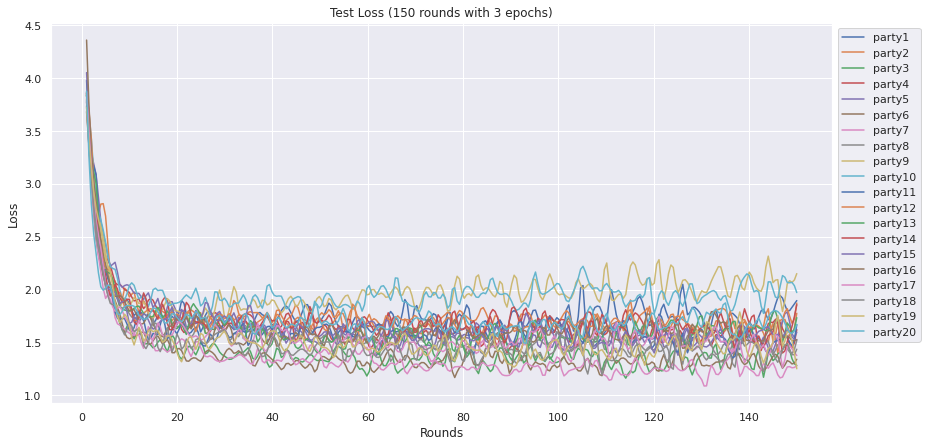

In [7]:
LIST_OF_ROUNDS = range(1, ROUNDS + 1)
f = plt.figure(figsize=(14, 7))

for i in range(NUM_OF_PARTIES):
    party_label = f"party{i+1}"
    eval_party_xaxis, eval_party_yaxis = smooth_curve(LIST_OF_ROUNDS, eval_party_loss[i])
    sns.lineplot(eval_party_xaxis, eval_party_yaxis, legend="brief", label=party_label)
plt.title(f'Test Loss ({ROUNDS} rounds with {EPOCHS} epochs)')
plt.ylabel('Loss')
plt.xlabel('Rounds')
# plt.xticks(LIST_OF_ROUNDS)
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('test_loss.png', dpi=200)
plt.show()

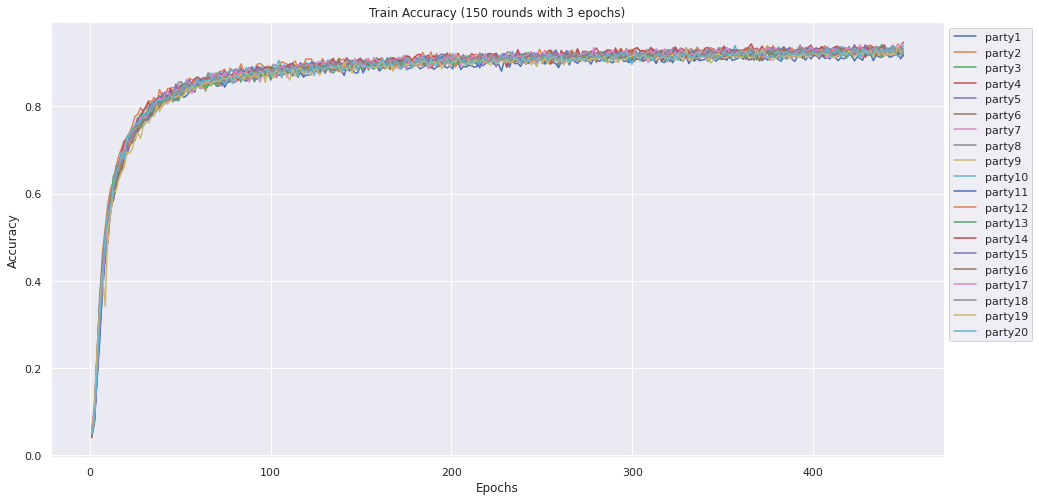

In [8]:
LIST_OF_EPOCHS = range(1, EPOCHS * ROUNDS + 1)
f = plt.figure(figsize=(16, 8))

for i in range(NUM_OF_PARTIES):
    party_label = f"party{i+1}"
    eval_party_xaxis, eval_party_yaxis = smooth_curve(LIST_OF_EPOCHS, train_party_acc[i])
    sns.lineplot(eval_party_xaxis, eval_party_yaxis, legend="brief", label=party_label)
plt.title(f'Train Accuracy ({ROUNDS} rounds with {EPOCHS} epochs)')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
# plt.xticks(LIST_OF_EPOCHS)
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('train_accuracy.png', dpi=200)
plt.show()

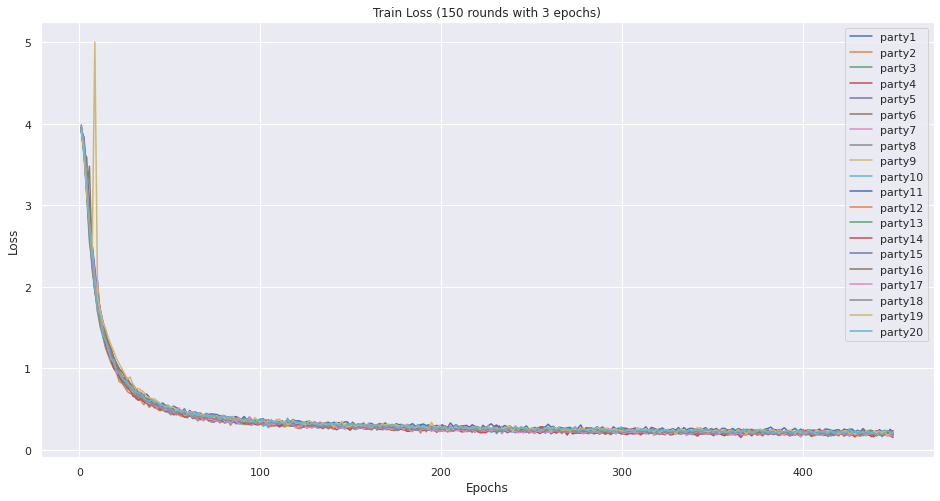

In [9]:
LIST_OF_EPOCHS = range(1, EPOCHS * ROUNDS + 1)
f = plt.figure(figsize=(16, 8))

for i in range(NUM_OF_PARTIES):
    party_label = f"party{i+1}"
    eval_party_xaxis, eval_party_yaxis = smooth_curve(LIST_OF_EPOCHS, train_party_loss[i])
    sns.lineplot(eval_party_xaxis, eval_party_yaxis, legend="brief", label=party_label)
plt.title(f'Train Loss ({ROUNDS} rounds with {EPOCHS} epochs)')
plt.ylabel('Loss')
plt.xlabel('Epochs')
# plt.xticks(LIST_OF_EPOCHS)
plt.legend(bbox_to_anchor=(1, 1))
plt.savefig('train_loss.png', dpi=200)
plt.show()

In [10]:
aggregator.model_synch()

2021-06-12T18:21:04.025Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Initiating global model sync requests.
2021-06-12T18:21:04.027Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_handler             | Sync Global Model<ibmfl.model.model_update.ModelUpdate object at 0x7f04bf408a90>
2021-06-12T18:21:04.028Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-12T18:21:05.873Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-12T18:21:05.874Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-12T18:21:05.875Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-12T18:21:05.876Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Finished sync model requests


In [11]:
aggregator.eval_model()

2021-06-12T18:21:05.881Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Initiating evaluation requests.
2021-06-12T18:21:05.882Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-12T18:21:07.292Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-12T18:21:07.293Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-12T18:21:07.293Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-12T18:21:07.294Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_handler             | Finished evaluate model requests.
2021-06-12T18:21:07.294Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Finished eval requests


In [12]:
aggregator.save_model()

2021-06-12T18:21:07.300Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Initiating save model request.
2021-06-12T18:21:07.301Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | State: States.SND_REQ
2021-06-12T18:21:10.312Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Total number of success responses :20
2021-06-12T18:21:10.313Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of parties queried:20
2021-06-12T18:21:10.313Z | 1.0.5 | INFO | ibmfl.aggregator.protohandler.proto_handler        | Number of registered parties:20
2021-06-12T18:21:10.314Z | 1.0.5 | INFO | ibmfl.aggregator.fusion.fusion_handler             | Finished saving the models.
2021-06-12T18:21:10.314Z | 1.0.5 | INFO | ibmfl.aggregator.aggregator                        | Finished save requests
